In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sounddevice as sd

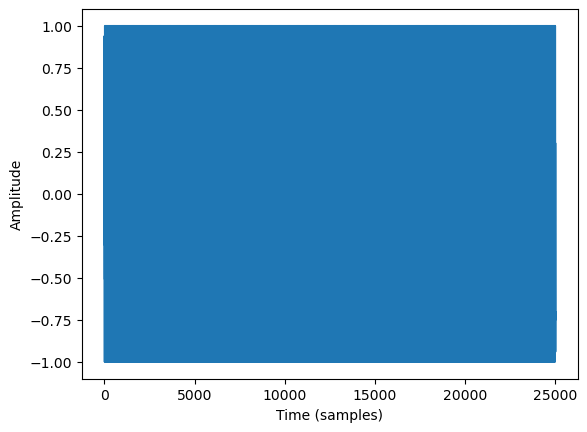

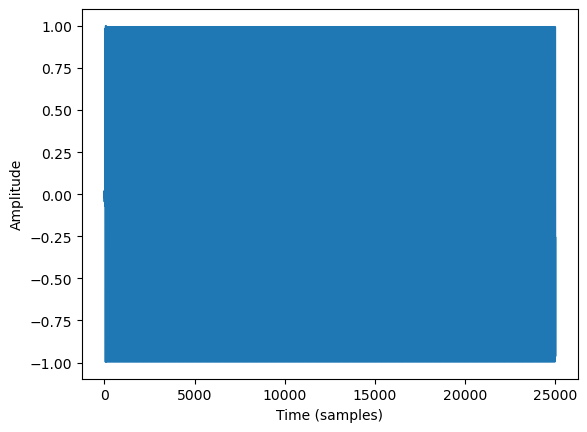

In [3]:
bipsin_mixed, fs = librosa.load('bipsin_mixed.wav', sr=None)
bipsout_mixed, fs = librosa.load('bipsout_mixed.wav', sr=None)

plt.plot(bipsin_mixed)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

plt.plot(bipsout_mixed)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

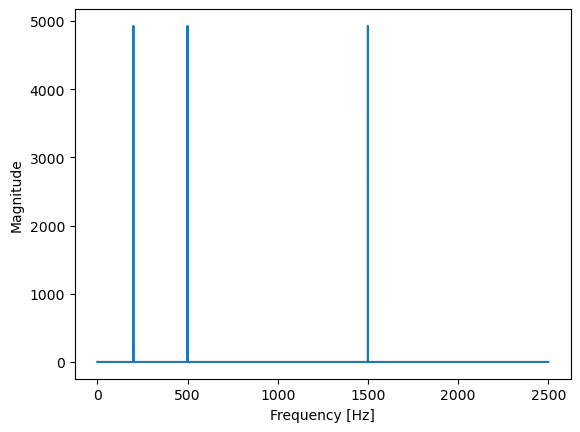

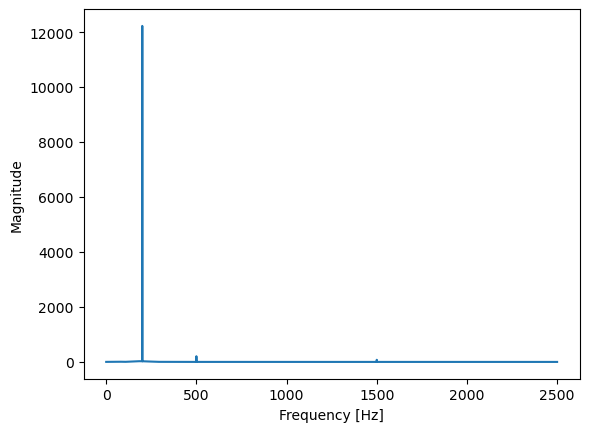

In [4]:
fft_bipsin_mixed = np.fft.fft(bipsin_mixed)
fft_bipsout_mixed = np.fft.fft(bipsout_mixed)
freqs = np.fft.fftfreq(len(fft_bipsin_mixed), 1/fs)
freqs = freqs[:len(freqs)//2]
fft_bipsin_mixed = fft_bipsin_mixed[:len(fft_bipsin_mixed)//2]
fft_bipsout_mixed = fft_bipsout_mixed[:len(fft_bipsout_mixed)//2]

plt.plot(freqs, np.abs(fft_bipsin_mixed))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

plt.plot(freqs, np.abs(fft_bipsout_mixed))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

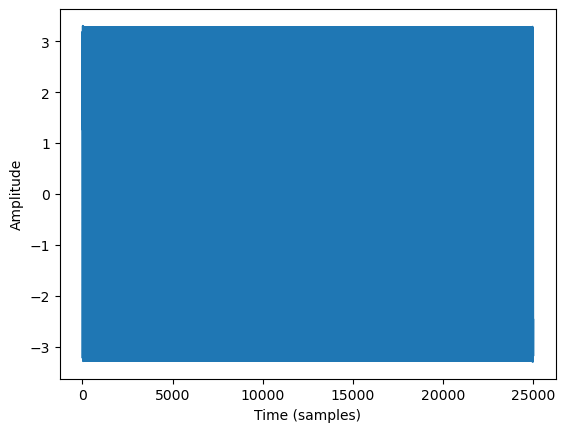

In [42]:
duracao = (len(bipsin_mixed))/fs
n = np.arange(-duracao/2, duracao/2, 1/fs)
fc = 300 # Frequência de corte do filtro

# Fazendo um sinal no dominio do tempo h[n] que seja uma sinc com frequência igual a 300Hz
h = np.sinc(2*fc*n)

# Fazendo a convolução entre o sinal de entrada e o filtro h[n]
bipsin_filtered = np.convolve(bipsin_mixed, h, mode='same')
#bipsin_filtered = bipsin_filtered/3

plt.plot(bipsin_filtered)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()



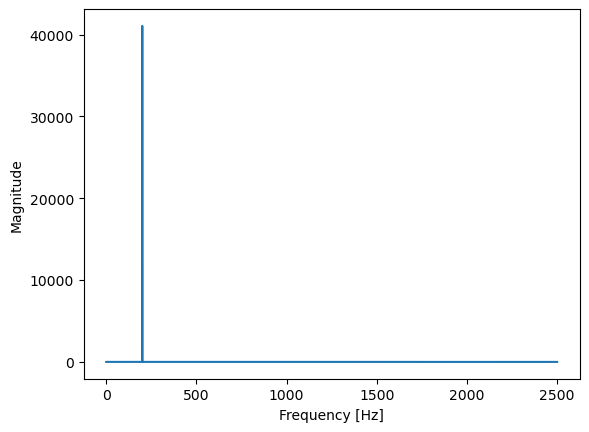

In [43]:
bipsin_filtered_fft = np.fft.fft(bipsin_filtered)
bipsin_filtered_fft = bipsin_filtered_fft[:len(bipsin_filtered_fft)//2]

plt.plot(freqs, np.abs(bipsin_filtered_fft))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()


In [41]:
sd.play(bipsin_mixed, fs)
sd.wait()
sd.play(bipsin_filtered, fs)
sd.wait()
sd.play(bipsout_mixed, fs)
sd.wait()
